# COVID-19 Evolution Germany
miwa.egner@gmail.com, 2020-03-22

In [106]:
# define the error function for fitting
def fit_func(x,a,b):
    import scipy
    fit = 80E6*(scipy.special.erf(a*(x-b)) + 1)*0.5
    return fit

In [107]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib.dates import (DateFormatter, drange)
import seaborn as sns
import datetime

In [129]:
# data for Germany from Johns Hopkins University
# https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
ydata = np.array([
    0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,\
    48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,
    22364,24873,29056, 31554])
# to Mar 24
xdata = np.arange(1,len(ydata)+1)
date1 = datetime.date(2020, 1, 22)
date2 = datetime.date(2020, 1, 22) + datetime.timedelta(days=len(ydata))
delta = datetime.timedelta(days=1)
dates = drange(date1, date2, delta)

In [130]:
# fit the data to the error function
from scipy.optimize import curve_fit
popt, pcov = curve_fit(fit_func, xdata, ydata, p0=[0.04, 120])
yfit = fit_func(xdata, popt[0], popt[1])

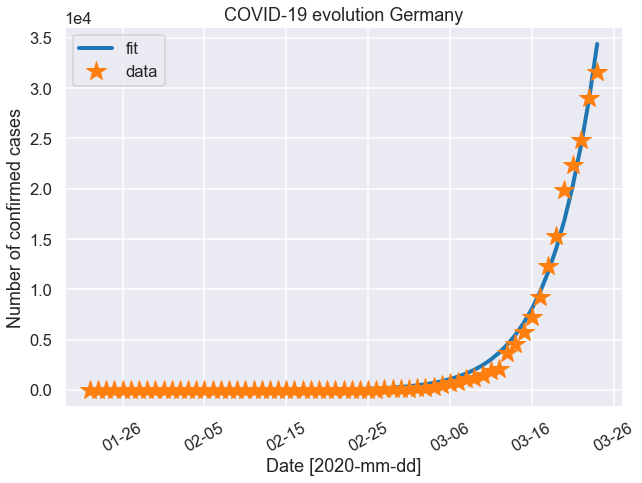

In [131]:
# plot the data and the fitted function
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(dates, yfit, '-', linewidth=4, label="fit")
ax.plot(dates, ydata, '*', linewidth=4, label="data", markersize=20)
ax.set_xlabel(r"Date [2020-mm-dd]")
ax.set_ylabel(r"Number of confirmed cases")
ax.set_title(r"COVID-19 evolution Germany")
ax.grid(True)
#ax.tick_params(labelsize=14)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.legend()
plt.show()
#fig.savefig('c1.png')

In [132]:
# extrapolate to the coming months
x_ex = np.arange(1, 150)
y_ex = fit_func(x_ex, popt[0], popt[1])
date1 = datetime.date(2020, 1, 22)
date2 = datetime.date(2020, 1, 22) + datetime.timedelta(days=len(x_ex))
delta = datetime.timedelta(days=1)
dates_ex = drange(date1, date2, delta)

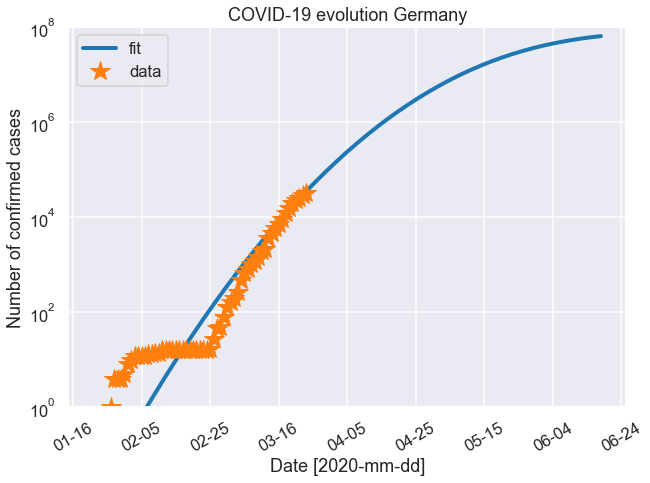

In [133]:
# plot the data and the extra-polation
fig, ax = plt.subplots(figsize=(10, 7))
ax.semilogy(dates_ex, y_ex, '-', linewidth=4, label="fit")
ax.semilogy(dates, ydata, '*', linewidth=4, label="data", markersize=20)
ax.set_xlabel(r"Date [2020-mm-dd]") # , fontsize=14)
ax.set_ylabel(r"Number of confirmed cases") # , fontsize=14)
ax.set_title(r"COVID-19 evolution Germany") # , fontsize=22)
ax.grid(True)
ax.set_ylim(1, 100E6)
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)# , labelsize=10)
locmin = ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
plt.legend()
plt.show()
#fig.savefig('c2.png')

In [134]:
start_date = datetime.date(2020, 1, 22)
idx = pd.date_range(start=start_date, 
                          periods=len(ydata), freq='D')
df = pd.DataFrame(idx, columns=['Date'])
df['Infected'] = ydata

In [135]:
xx = df[df['Date'] > '2020-02-25'].index.values
yy = df[df['Date'] > '2020-02-25']['Infected'].values

In [136]:
nn  = 200
xf  = np.arange(1,nn+1)
t, v = curve_fit(fit_func, xx, yy, p0=[0.03, 120])

In [137]:
yf = fit_func(xf, t[0], t[1])
idxf = pd.date_range(start=start_date, 
                     periods=nn, freq='D')
dfp = pd.DataFrame(idxf, columns=['Date'])
dfp['Prognose'] = yf
dfp

,Date,Prognose
0,2020-01-22,1.446145e-02
1,2020-01-23,1.967896e-02
2,2020-01-24,2.671827e-02
3,2020-01-25,3.619353e-02
4,2020-01-26,4.891815e-02
...,...,...
195,2020-08-04,7.992734e+07
196,2020-08-05,7.993836e+07
197,2020-08-06,7.994782e+07
198,2020-08-07,7.995593e+07


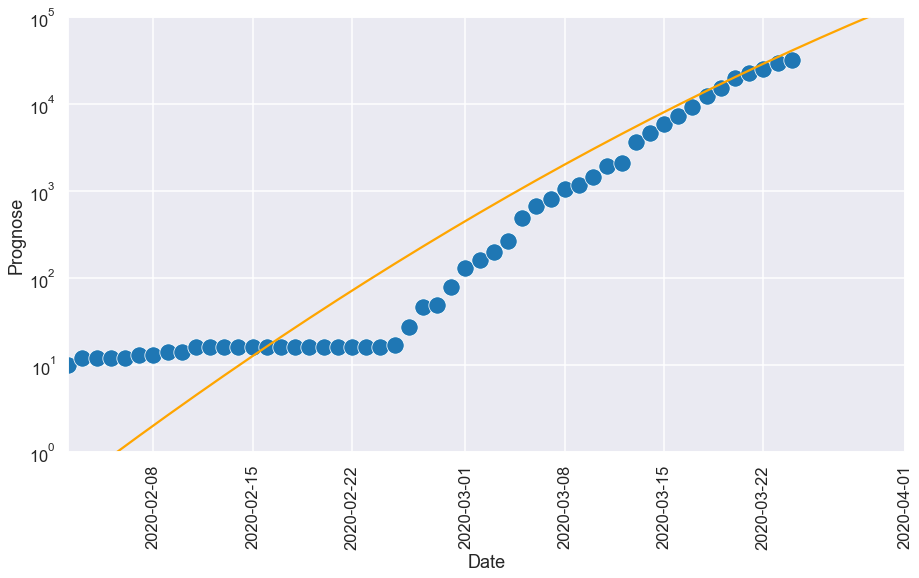

In [138]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.set_style('darkgrid')
sns.set_context('talk')
g = sns.scatterplot(x='Date', 
                    y='Infected',
                    data = df,
                    s = 300, 
                    palette='BrBG')
g.set(xlim=[pd.Timestamp('2020-02-02'), pd.Timestamp('2020-04-01')], 
            ylim=(1,1e5),yscale='log')
sns.lineplot(x='Date', y='Prognose', data=dfp, color='orange')

In [139]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import cufflinks as cf
%matplotlib inline 
init_notebook_mode(connected=True)
cf.go_offline()

In [140]:
f = go.Figure()
f.add_trace(go.Scatter(x=df['Date'], y=df['Infected'], 
                       mode='markers', name='Infected', 
                       marker=dict(symbol="circle", size=16,
                                   line=dict(width=1, color='white'))))

f.add_trace(go.Scatter(x=dfp['Date'], y=dfp['Prognose'], 
                       mode='lines', name='Prognose'))
f.update_layout(yaxis_type="log", template='ggplot2')
f.show()

Conclusion:
* 1 million cases: ~8th April
* 70% infected: ~20th May

In [141]:
# calculate the probability to have at least one infection in your company
people_germany = 80E6
people_company = 300
name_company = "company"

array_prob_company = np.array([0])
for day in np.arange(0,len(x_ex)-1):
    number_infections = y_ex[day]
    prob_company = 1 - np.exp(-people_company*(number_infections/people_germany))
    array_prob_company = np.append(array_prob_company, prob_company)

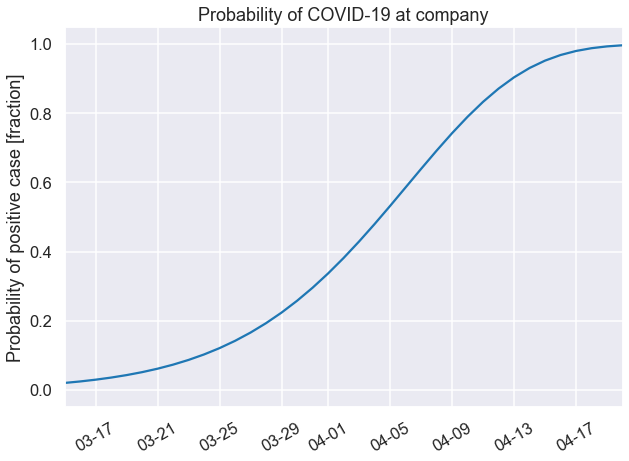

In [142]:
# plot the probability to have at least one infection in your company
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot_date(dates_ex, array_prob_company, '-')
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.xaxis.set_tick_params(rotation=30)# , labelsize=10)
ax.set_ylabel(r"Probability of positive case [fraction]")
ax.set_title(r"Probability of COVID-19 at {0}".format(name_company))
ax.grid(True)
ax.set_xlim(datetime.date(2020, 3, 15), datetime.date(2020, 4, 20))
#ax.tick_params(labelsize=14)
# plt.legend(fontsize=14)
plt.savefig('prob_' + name_company + '.png')
plt.show()

In [143]:
start_date = datetime.date(2020, 1, 22)
idx = pd.date_range(start=start_date, 
                          periods=len(ydata), freq='D')
df = pd.DataFrame(idx, columns=['Date'])
df['Infected'] = ydata

yf = func2(xf, t[0], t[1])
idxf = pd.date_range(start=start_date, 
                     periods=nn, freq='D')
dfp = pd.DataFrame(idxf, columns=['Date'])
dfp['Prognose'] = yf

In [144]:
f = go.Figure()
f.add_trace(go.Scatter(x=df['Date'], y=df['Infected'], 
                       mode='markers', name='Infected', 
                       marker=dict(symbol="circle", size=16,
                                   line=dict(width=1, color='white'))))

f.add_trace(go.Scatter(x=dfp['Date'], y=dfp['Prognose'], 
                       mode='lines', name='Prognose'))
f.update_layout(yaxis_type="log", template='ggplot2')
f.show()